# HEART DISEASE

COLUMNS ARE 
AGE
SEX
CHEST PAIN
RESTING BP
CHOLESTROL
FASTING BLOOD SUGAR
resting electrocardiographic results
maximum heart rate 
exercise induced angina
ST depression induced by exercise relative to rest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Import Plotly Express
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



import warnings
warnings.filterwarnings("ignore")





In [2]:
# LOADING CSV DATAFRAME INTO PANDAS DATAFRAME
df=pd.read_csv('heart.csv')

df['sex'] = df['sex'].replace({'Female':0, 'Male':1})

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [5]:
#no of rows and cols
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#Checking how many null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [10]:
#Target variable is Heart Disease
#Checking distribution of target variable 
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [11]:
#Calculate summary statistics such as mean, median, mode, standard deviation, minimum, and maximum for numerical features 
#in your dataset. This will give you a general idea of the distribution of your data.

summary_stats = df.describe()

print(summary_stats)

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [12]:
#df.mode() calculates the mode for each column in your DataFrame. If there are multiple modes, it returns the smallest one.
mode_per_column = df.mode()
print(mode_per_column)

    age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   204  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    1.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN  


In [13]:
#iloc[0] is used to select the first row of the DataFrame returned by df.mode() because it returns a DataFrame where each 
#column contains the mode(s) for that column.

mode = df.mode().iloc[0]
print(mode)

age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        204.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: float64


In [14]:
df.mode()

#You can also calculate mode separately for the entire DataFrame or individually for each column using df.mode()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   204  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    1.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN

# FEATURE EXTRACTION


1. BASED ON THE DATA WE CAN CREATE NEW COLUMNS LIKE Max Heart Rate Reserve BY Calculating the difference between the maximum heart rate achieved during exercise (thalach) and the resting heart rate (restecg) to create a new feature representing the max heart rate reserve.


In [15]:
df['max_hr_reserve'] = df['thalach'] - df['restecg']

In [16]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  max_hr_reserve  
0   2     3       0             167  
1   0     3       0             155  
2   0     3       0             124  
3   1     3       0             160  
4   3     2       0             105

# VISUALISATIONS 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1025 non-null   int64  
 1   sex             1025 non-null   int64  
 2   cp              1025 non-null   int64  
 3   trestbps        1025 non-null   int64  
 4   chol            1025 non-null   int64  
 5   fbs             1025 non-null   int64  
 6   restecg         1025 non-null   int64  
 7   thalach         1025 non-null   int64  
 8   exang           1025 non-null   int64  
 9   oldpeak         1025 non-null   float64
 10  slope           1025 non-null   int64  
 11  ca              1025 non-null   int64  
 12  thal            1025 non-null   int64  
 13  target          1025 non-null   int64  
 14  max_hr_reserve  1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


<Axes: xlabel='age', ylabel='Count'>

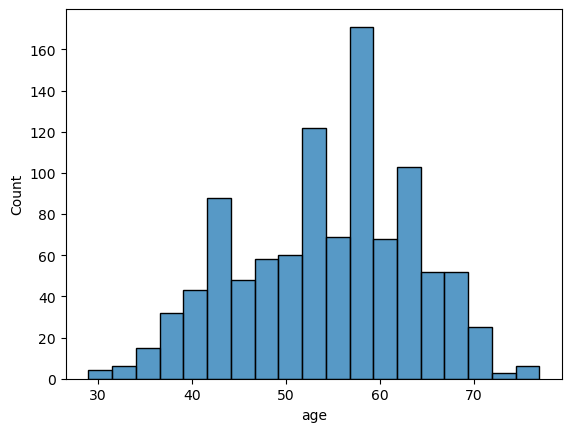

In [18]:
# Draw a histogram to see the distribution of the age column
sns.histplot(df['age'])

Mean 54.43414634146342
Median 56.0
Mode 0    58
Name: age, dtype: int64


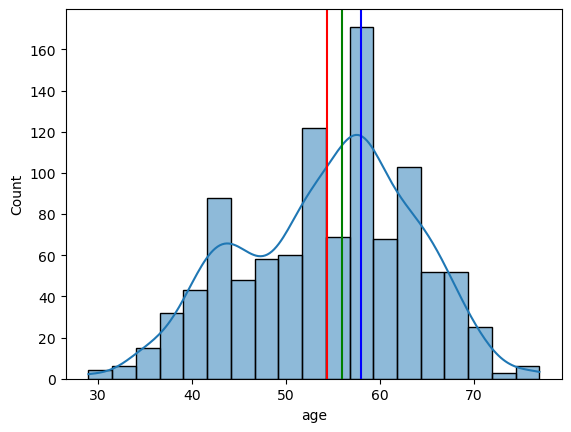

In [19]:
# Plot the mean, Median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

In [20]:
#Lets explore the gender base distribution of the dataset for age column
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [21]:
# Find the values of sex column
df['sex'].value_counts()


sex
1    713
0    312
Name: count, dtype: int64

In [22]:
# Find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex  age
0    62     24
     58     21
     63     17
     54     15
     55     15
            ..
1    69      6
     29      4
     34      3
     37      3
     77      3
Name: count, Length: 73, dtype: int64

# CHEST PAIN COLUMN

In [23]:
# value count of cp column
df['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

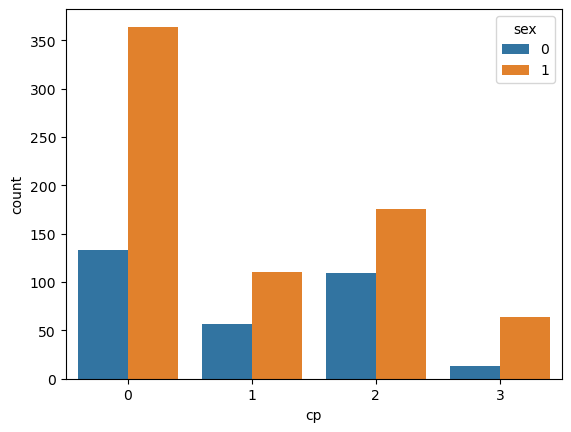

In [24]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

# TRESTBPS Column

The normal resting blood pressure is 120/80 mm Hg.

In [25]:
# lets summerize the trestbps column
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

In [26]:
df['trestbps'].isnull().sum()

#NO MISSING VALUES


0

# OUTLIER REMOVAL

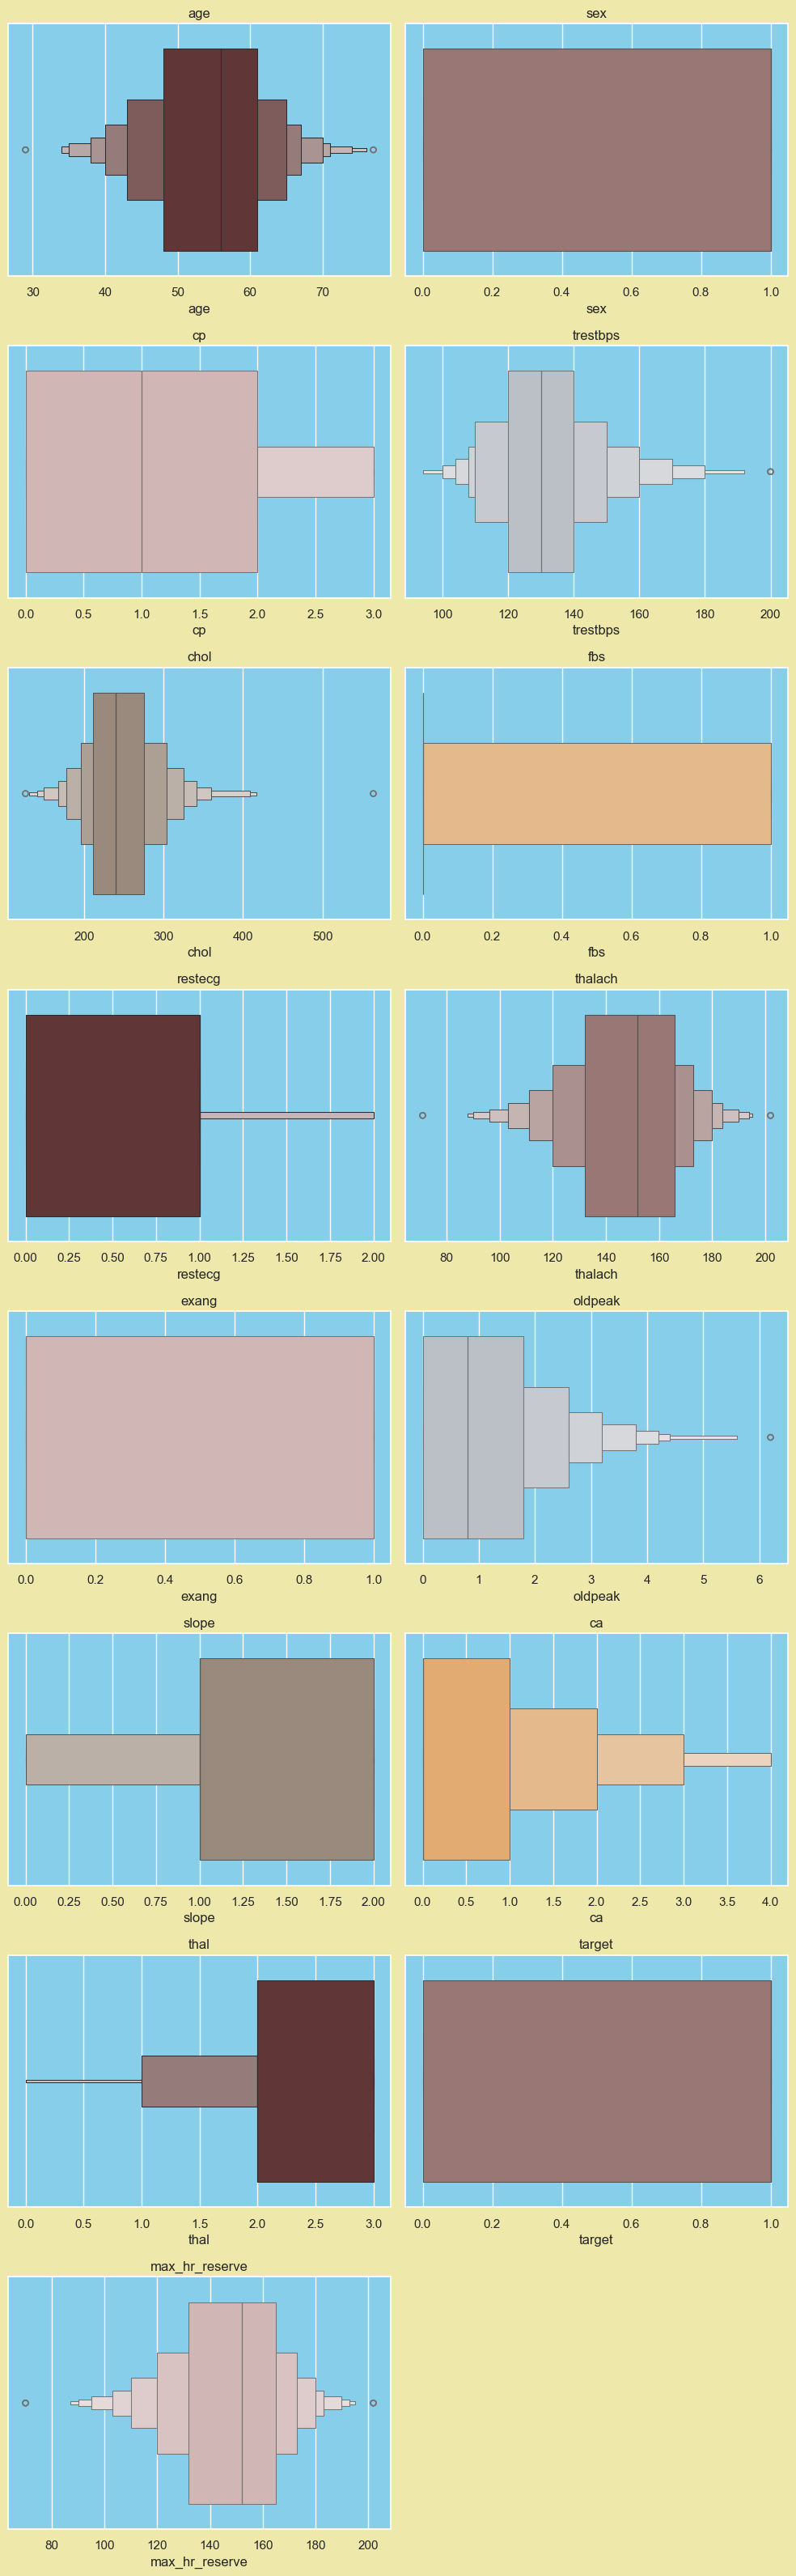

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(10, num_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



ANALYSIS OF PLOT
It seems there are outliers in the columns but we will examine it that its really the outliers or not because sometime these values come in outliers range but it really not.\ The outliers totally depends on the range which is different for every column in the dataset.

# FINDING OUTLIERS
1. CHOL - AT AROUND 580
2. OLDPEAK - AT AROUND 6.2
3. TRESTBPS - AT AROUND 200
4. AGE - AT AROUND 28

# OUTLIERS IN CHOLESTROL 

Z-Score Method
The z-score method is a statistical technique used to detect outliers by measuring how many standard deviations a data point is away from the mean. A z-score tells you how relatively far a data point is from the mean in terms of standard deviations

 First we will get the upper and lower limits

In [28]:
# find the limits
upper_limit = df['chol'].mean() + 3*df['chol'].std()
lower_limit = df['chol'].mean() - 3*df['chol'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 400.77753061854617
lower limit: 91.2224693814538


In [29]:
# find the outliers
df.loc[(df['chol'] > upper_limit) | (df['chol'] < lower_limit)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
192   67    0   2       115   564    0        0      160      0      1.6   
450   63    0   0       150   407    0        0      154      0      4.0   
464   67    0   2       115   564    0        0      160      0      1.6   
481   63    0   0       150   407    0        0      154      0      4.0   
641   56    0   0       134   409    0        0      150      1      1.9   
665   65    0   2       140   417    1        0      157      0      0.8   
685   63    0   0       150   407    0        0      154      0      4.0   
889   63    0   0       150   407    0        0      154      0      4.0   
958   65    0   2       140   417    1        0      157      0      0.8   
996   56    0   0       134   409    0        0      150      1      1.9   

     slope  ca  thal  target  max_hr_reserve  
123      2   1     2       1             157  
158      1   0     3       1             160  
179      1   2     3       0             150  
192      1   0     3       1             160  
450      1   3     3       0             154  
464      1   0     3       1             160  
481      1   3     3       0             154  
641      1   2     3       0             150  
665      2   1     2       1             157  
685      1   3     3       0             154  
889      1   3     3       0             154  
958      2   1     2       1             157  
996      1   2     3       0             150

This code snippet calculates the upper limit as the mean plus three times the standard deviation (mean + 3 * std) and the lower limit as the mean minus three times the standard deviation (mean - 3 * std)

These limits define a range beyond which data points are considered outliers based on the z-score method

Next we will trim the outliers. Trimming is a data transformation technique where outliers are removed or "trimmed" from the dataset, rather than replacing or imputing their values. Trimming involves setting a threshold or cutoff value, and any data points exceeding this threshold are removed from the dataset

In [30]:
# trimming - delete the outlier data
new_df = df.loc[(df['chol'] <= upper_limit) & (df['chol'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 1025
after removing outliers: 1012
outliers: 13


<Axes: ylabel='chol'>

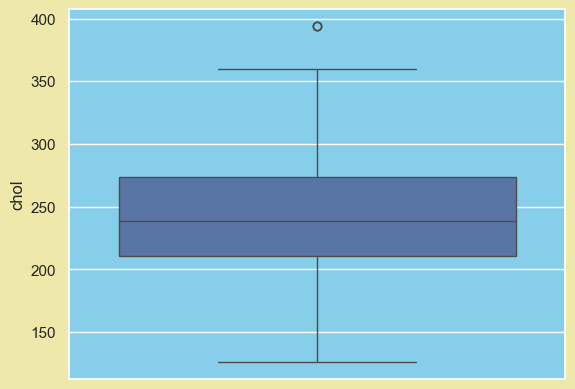

In [31]:
sns.boxplot(new_df['chol'])

# OUTLIERS IN OLD PEAK


In [32]:
# find the limits
upper_limit = df['oldpeak'].mean() + 3*df['oldpeak'].std()
lower_limit = df['oldpeak'].mean() - 3*df['oldpeak'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 4.59667196057247
lower limit: -2.4536475703285667


In [33]:
# find the outliers
df.loc[(df['oldpeak'] > upper_limit) | (df['oldpeak'] < lower_limit)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
54    55    1   0       140   217    0        1      111      1      5.6   
55    55    1   0       140   217    0        1      111      1      5.6   
69    62    0   0       160   164    0        0      145      0      6.2   
393   62    0   0       160   164    0        0      145      0      6.2   
526   62    0   0       160   164    0        0      145      0      6.2   
613   55    1   0       140   217    0        1      111      1      5.6   
833   55    1   0       140   217    0        1      111      1      5.6   

     slope  ca  thal  target  max_hr_reserve  
54       0   0     3       0             110  
55       0   0     3       0             110  
69       0   3     3       0             145  
393      0   3     3       0             145  
526      0   3     3       0             145  
613      0   0     3       0             110  
833      0   0     3       0             110

In [34]:
# Trimming - delete the outlier data
new_df1 = df.loc[(df['oldpeak'] <= upper_limit) & (df['oldpeak'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(new_df1))
print('outliers:', len(df) - len(new_df1))


before removing outliers: 1025
after removing outliers: 1018
outliers: 7


<Axes: ylabel='oldpeak'>

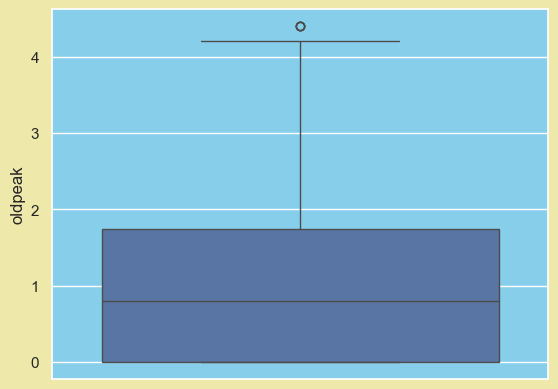

In [35]:
sns.boxplot(new_df1['oldpeak'])

# OUTLIERS IN AGE


In [36]:
df.age.describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

Minimum age is 31 to have chest pain which can be possible so its not an outlier.\ We have observed that the minimum age for experiencing chest pain is 31, any observation at this age wouldn't be considered an outlier within the context of age-related data. Outliers typically deviate significantly from the majority of observations, but in this case, 31 falls within the expected range for experiencing chest pain.
max age is 77 which is also possible so its not an outlier as well.\ The maximum age for experiencing chest pain is 77, any observation at this age wouldn't be classified as an outlier within the dataset. Outliers are typically defined as values that significantly deviate from the majority, but in this case, 77 falls within the expected range for chest pain occurrences.

# OUTLIERS IN THAL


In [37]:
# find the limits
upper_limit = df['thal'].mean() + 3*df['thal'].std()
lower_limit = df['thal'].mean() - 3*df['thal'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 4.185883153177474
lower limit: 0.4619217248713061


In [38]:
# trimming - delete the outlier data
new_df = df.loc[(df['thal'] <= upper_limit) & (df['thal'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 1025
after removing outliers: 1018
outliers: 7


<Axes: ylabel='thal'>

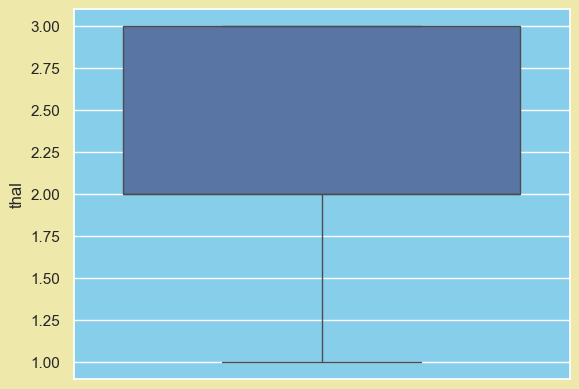

In [39]:
sns.boxplot(new_df['thal'])

# OUTLIERS IN TRESTBPS

In [40]:
# find the limits
upper_limit = df['trestbps'].mean() + 3*df['trestbps'].std()
lower_limit = df['trestbps'].mean() - 3*df['trestbps'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 184.1618613332024
lower limit: 79.06155330094396


In [41]:
# find the outliers
df.loc[(df['trestbps'] > upper_limit) | (df['trestbps'] < lower_limit)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
151   54    1   1       192   283    0        0      195      0      0.0   
175   56    0   0       200   288    1        0      133      1      4.0   
246   54    1   1       192   283    0        0      195      0      0.0   
294   56    0   0       200   288    1        0      133      1      4.0   
326   54    1   1       192   283    0        0      195      0      0.0   
508   56    0   0       200   288    1        0      133      1      4.0   
688   56    0   0       200   288    1        0      133      1      4.0   

     slope  ca  thal  target  max_hr_reserve  
151      2   1     3       0             195  
175      0   2     3       0             133  
246      2   1     3       0             195  
294      0   2     3       0             133  
326      2   1     3       0             195  
508      0   2     3       0             133  
688      0   2     3       0             133

In [42]:
# trimming - delete the outlier data
new_df = df.loc[(df['trestbps'] <= upper_limit) & (df['trestbps'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 1025
after removing outliers: 1018
outliers: 7


<Axes: ylabel='trestbps'>

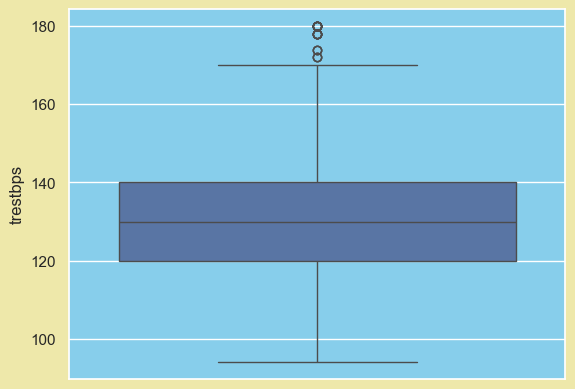

In [43]:
sns.boxplot(new_df['trestbps'])

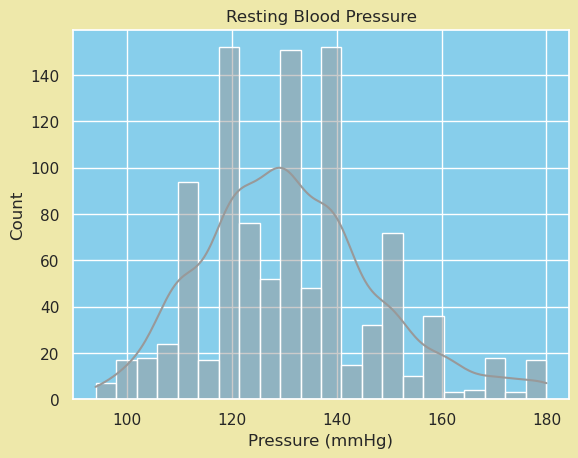

In [44]:
palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=new_df, 
             x='trestbps', 
             kde=True,
             color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2] 

<Axes: xlabel='trestbps', ylabel='Count'>

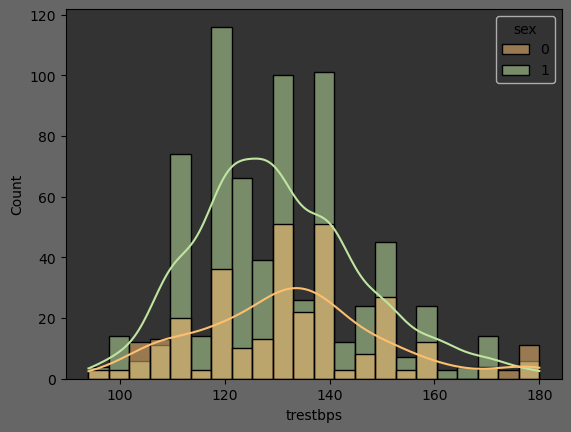

In [45]:


# create a histplot trestbops column to analyse with sex column
sns.histplot(new_df, x='trestbps', kde=True, palette = "Spectral", hue ='sex')

In [46]:
# Calculate the IQR for trestbps and chol
# The IQR is a measure of statistical dispersion and is defined as the difference between the third quartile (Q3) and the first
# quartile (Q1). 
Q1_trestbps = df['trestbps'].quantile(0.25)
Q3_trestbps = df['trestbps'].quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps
upper_bound_trestbps = Q3_trestbps + 1.5 * IQR_trestbps

Q1_chol = df['chol'].quantile(0.25)
Q3_chol = df['chol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol
upper_bound_chol = Q3_chol + 1.5 * IQR_chol

# Calculate the mean for trestbps and chol excluding upper bound outliers
mean_trestbps = df.loc[df['trestbps'] <= upper_bound_trestbps, 'trestbps'].mean()
mean_chol = df.loc[df['chol'] <= upper_bound_chol, 'chol'].mean()

# Replace upper bound outliers with the calculated mean value
df.loc[df['trestbps'] > upper_bound_trestbps, 'trestbps'] = mean_trestbps
df.loc[df['chol'] > upper_bound_chol, 'chol'] = mean_chol

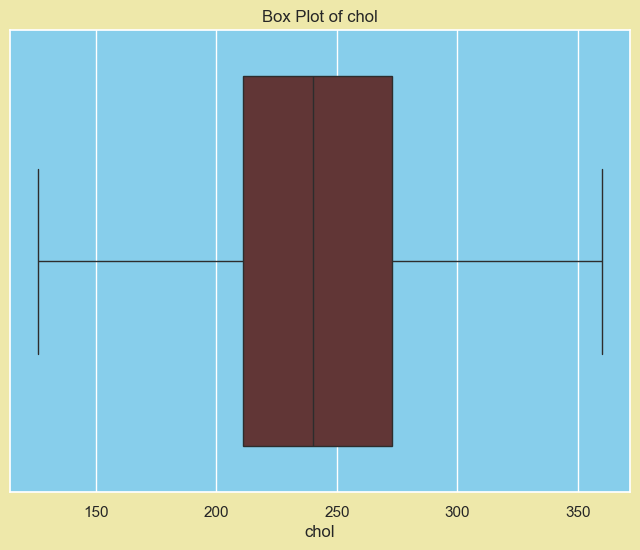

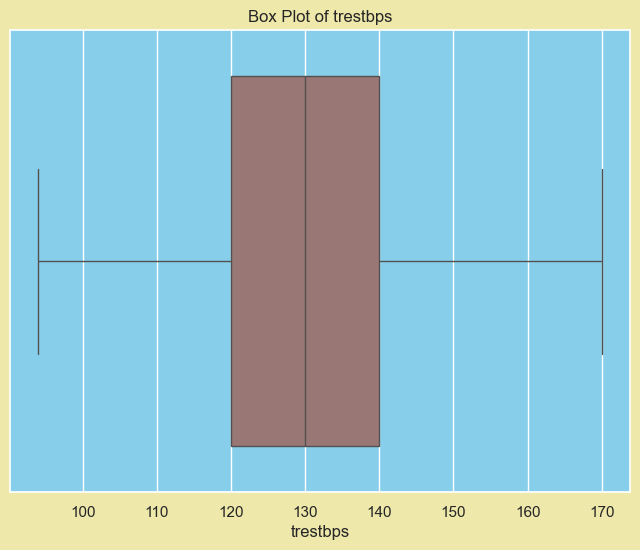

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom color palette and figure background color
sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Box plot for 'chol'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['chol'], color=palette[0])  # Use the first color from the palette
plt.title('Box Plot of chol')
plt.show()

# Box plot for 'trestbps'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['trestbps'], color=palette[1])  # Use the second color from the palette
plt.title('Box Plot of trestbps')
plt.show()





# CHECKING RELATIONSHIP OF FEATURES WITH TARGET (scatter plot)


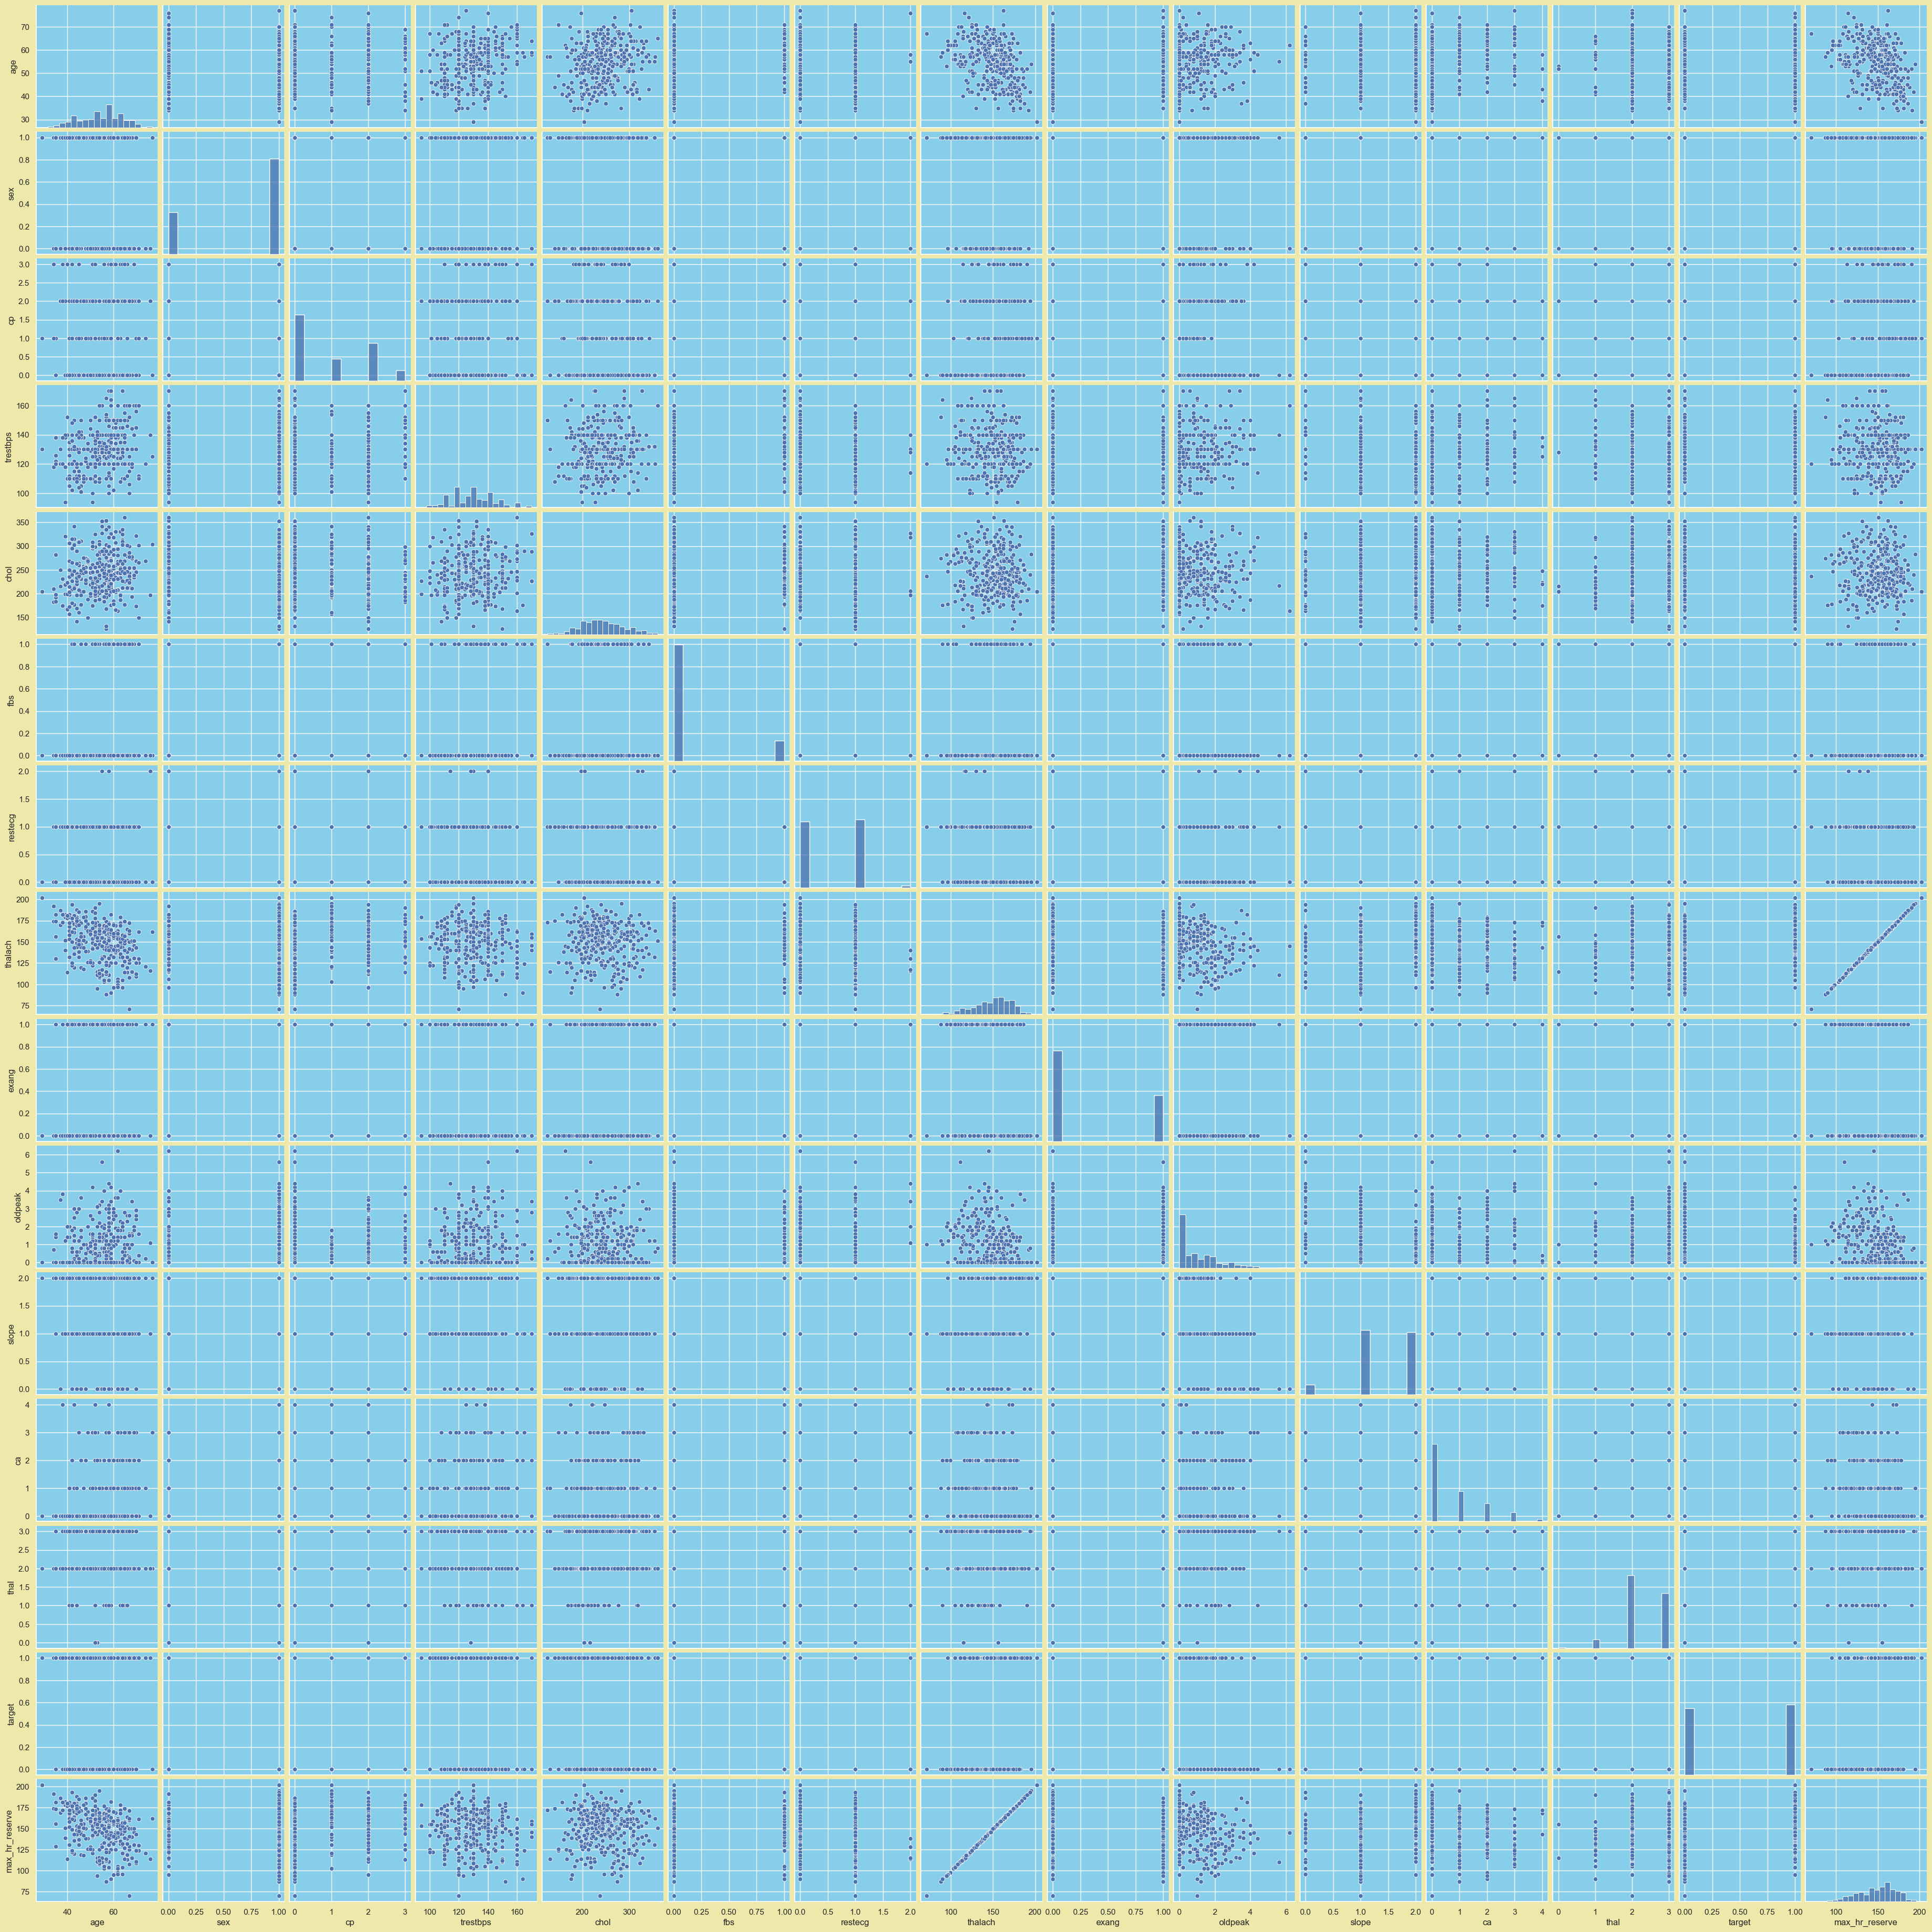

In [48]:
sns.pairplot(df)

# FEATURE SELECTION : CORRELATION & MULTICOLLINEARITY

# CORRELATION ->

<Axes: >

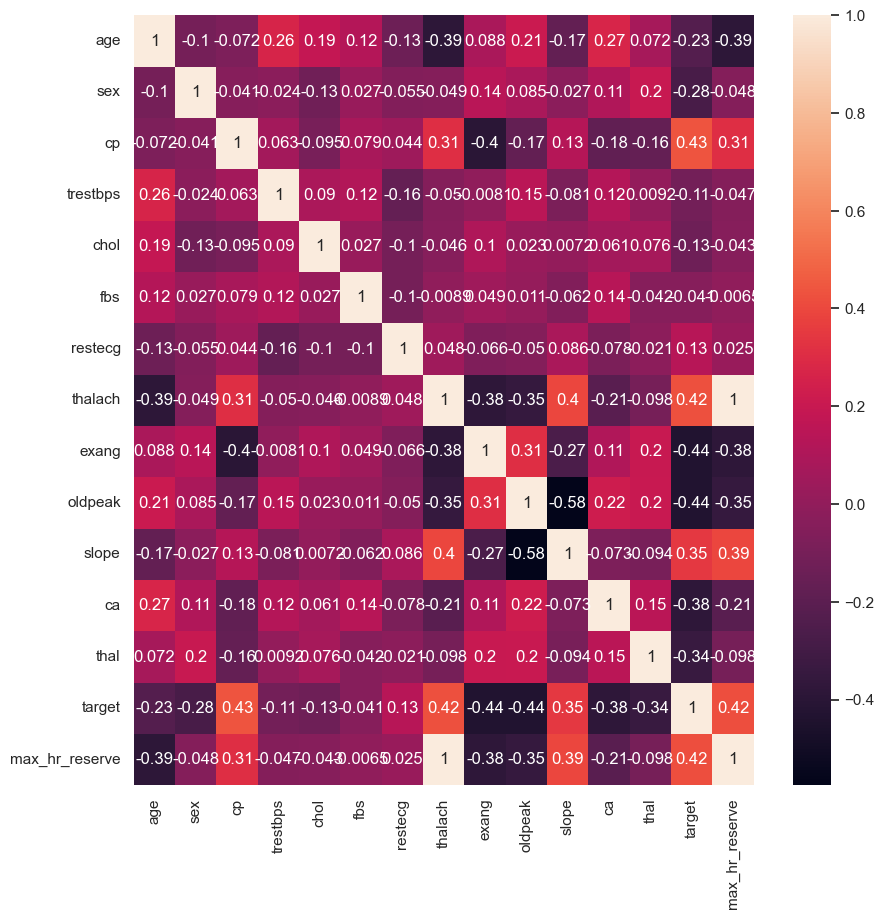

In [49]:
##correlation
df1=df
plt.figure(figsize=(10,10), facecolor='white')
cor_matrix=df1.corr()
sns.heatmap(cor_matrix,annot=True)

From the above graph we can say that none of the feature is highly correlated to the target variable

# MULTICOLLINEARITY

For multicollinearity we need to do feature scaling (bringing all the values in a common range)

In [50]:
x=df1.drop(columns=["target"])
x  ## features

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0     125.0  212.0    0        1      168      0      1.0   
1      53    1   0     140.0  203.0    1        0      155      1      3.1   
2      70    1   0     145.0  174.0    0        1      125      1      2.6   
3      61    1   0     148.0  203.0    0        1      161      0      0.0   
4      62    0   0     138.0  294.0    1        1      106      0      1.9   
...   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
1020   59    1   1     140.0  221.0    0        1      164      1      0.0   
1021   60    1   0     125.0  258.0    0        0      141      1      2.8   
1022   47    1   0     110.0  275.0    0        0      118      1      1.0   
1023   50    0   0     110.0  254.0    0        0      159      0      0.0   
1024   54    1   0     120.0  188.0    0        1      113      0      1.4   

      slope  ca  thal  max_hr_reserve  
0         2   2     3             167  
1         0   0     3             155  
2         0   0     3             124  
3         2   1     3             160  
4         1   3     2             105  
...     ...  ..   ...             ...  
1020      2   0     2             163  
1021      1   1     3             141  
1022      1   1     2             118  
1023      2   0     2             159  
1024      1   1     3             112  

[1025 rows x 14 columns]

In [51]:
y=df1["target"]
y  ## target variable

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

SCALING THE FEATURES

In [52]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
# fit_transform() is a method that computes the mean and standard deviation for each feature in the input data x and then 
# transforms the data using those computed values.
x_scaled

array([[-0.26843658,  0.66150409, -0.91575542, ...,  1.20922066,
         1.08985168,  0.80154989],
       [-0.15815703,  0.66150409, -0.91575542, ..., -0.73197147,
         1.08985168,  0.27924306],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -0.73197147,
         1.08985168, -1.07004957],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ...,  0.23862459,
        -0.52212231, -1.33120298],
       [-0.4889957 , -1.51170646, -0.91575542, ..., -0.73197147,
        -0.52212231,  0.45334534],
       [-0.04787747,  0.66150409, -0.91575542, ...,  0.23862459,
         1.08985168, -1.5923564 ]])

In [53]:
### computing variance_inflation_factor
#  VIF is a measure of multicollinearity in a set of regression variables. It quantifies how much the variance of the estimated
# regression coefficients is inflated due to collinearity.
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

# vif==1 no multicollinearity vf>1 high multicollinearity

vif        Features
0   1.410830             age
1   1.116445             sex
2   1.295627              cp
3   1.135317        trestbps
4   1.086327            chol
5   1.072732             fbs
6        inf         restecg
7        inf         thalach
8   1.423975           exang
9   1.700491         oldpeak
10  1.643630           slope
11  1.198971              ca
12  1.128759            thal
13       inf  max_hr_reserve

here vif of all features are less than 5 so it means that no multicollinearity exist so we consider all features are significant for prediction model

# LOGISTIC REGRESSION


Now dividing the data set into training and test data as 80% data for training and 20% data for testing as follows :

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.20, random_state = 355) ## giving scaled features

Getting shape of train and test data

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(820, 14)
(820,)
(205, 14)
(205,)


In [56]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [57]:
## prediction of test data
y_pred = log_reg.predict(x_test)
y_pred

# : This line uses the trained logistic regression model (log_reg) to predict the target variable for the testing data (x_test). The predict() method takes the testing features (x_test) as input and returns the predicted class labels.

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0], dtype=int64)

Model Evaluation Metrics

1. Confusion Matrix


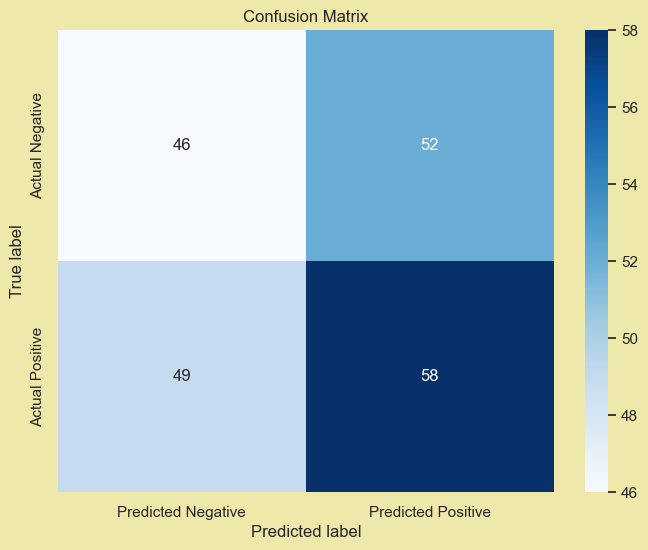

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



2. Accuracy 

In [59]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8634146341463415

3. Precision

In [60]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Precision

0.8602150537634409

4. Recall

In [61]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8421052631578947

5. F1 Score

In [62]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8421052631578947

ROC(Receiver Operating Characteristic Curve) and Area under curve(auc)
A graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) for different threshold values.

AUC-ROC (Area Under the ROC Curve): The area under the ROC curve, which quantifies the overall performance of a binary classification model across all possible threshold values. AUC-ROC values range from 0 to 1, where higher values indicate better performance.

In [63]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8631432411674347

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

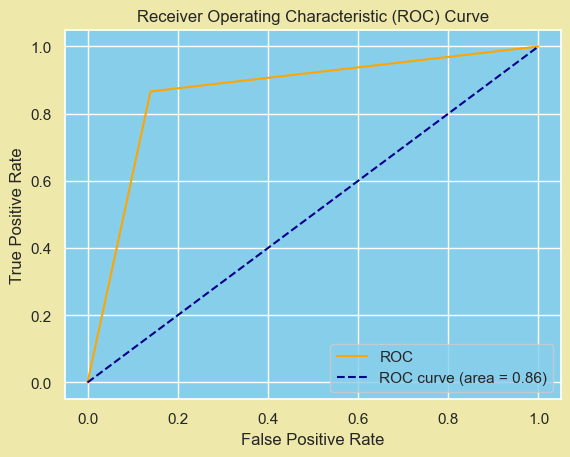

In [65]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# K MEANS CLUSTERING 

In [66]:
# I omit the categurical columns in oreder to achive better result in accuracy
data_all=df1
data_all_W_C=data_all.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1)
# now we only have numerical values in df

# Reset the index of the dataframe after dropping rows
data_all_W_C = data_all_W_C.reset_index(drop=True)
# ensures that the index is sequential and starts from 0.

data_all_W_C_t=data_all_W_C.drop(['target'],axis=1)

# data_all_W_C_t = data_all_W_C_t.dropna()
data_all_W_C_t

age  trestbps   chol  thalach  oldpeak  max_hr_reserve
0      52     125.0  212.0      168      1.0             167
1      53     140.0  203.0      155      3.1             155
2      70     145.0  174.0      125      2.6             124
3      61     148.0  203.0      161      0.0             160
4      62     138.0  294.0      106      1.9             105
...   ...       ...    ...      ...      ...             ...
1020   59     140.0  221.0      164      0.0             163
1021   60     125.0  258.0      141      2.8             141
1022   47     110.0  275.0      118      1.0             118
1023   50     110.0  254.0      159      0.0             159
1024   54     120.0  188.0      113      1.4             112

[1025 rows x 6 columns]

In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df = pd.DataFrame(data_all_W_C_t)

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# This scaler will scale the features to a specified range (by default, between 0 and 1).

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Print or further process the scaled DataFrame
print(df_scaled)

           age  trestbps      chol   thalach   oldpeak  max_hr_reserve
0     0.479167  0.407895  0.367521  0.740458  0.161290        0.734848
1     0.500000  0.605263  0.329060  0.641221  0.500000        0.643939
2     0.854167  0.671053  0.205128  0.412214  0.419355        0.409091
3     0.666667  0.710526  0.329060  0.687023  0.000000        0.681818
4     0.687500  0.578947  0.717949  0.267176  0.306452        0.265152
...        ...       ...       ...       ...       ...             ...
1020  0.625000  0.605263  0.405983  0.709924  0.000000        0.704545
1021  0.645833  0.407895  0.564103  0.534351  0.451613        0.537879
1022  0.375000  0.210526  0.636752  0.358779  0.161290        0.363636
1023  0.437500  0.210526  0.547009  0.671756  0.000000        0.674242
1024  0.520833  0.342105  0.264957  0.320611  0.225806        0.318182

[1025 rows x 6 columns]


In [68]:
df=df_scaled
df.corr()


age  trestbps      chol   thalach   oldpeak  \
age             1.000000  0.263883  0.186256 -0.390227  0.208137   
trestbps        0.263883  1.000000  0.090492 -0.050429  0.149932   
chol            0.186256  0.090492  1.000000 -0.045515  0.023409   
thalach        -0.390227 -0.050429 -0.045515  1.000000 -0.349796   
oldpeak         0.208137  0.149932  0.023409 -0.349796  1.000000   
max_hr_reserve -0.387511 -0.046687 -0.043220  0.999737 -0.348942   

                max_hr_reserve  
age                  -0.387511  
trestbps             -0.046687  
chol                 -0.043220  
thalach               0.999737  
oldpeak              -0.348942  
max_hr_reserve        1.000000

-------------------------CLUSTERING----------------------------------------

K MEANS

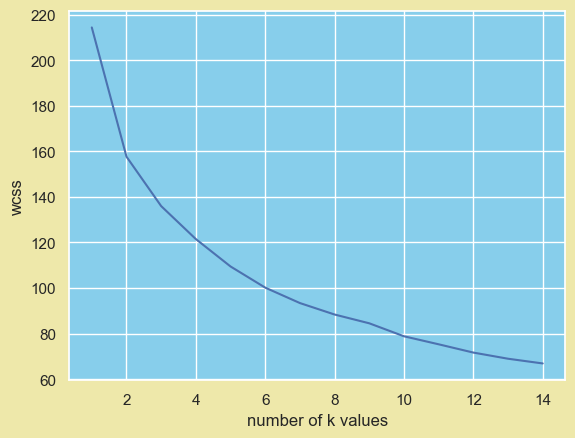

In [69]:
from sklearn.cluster import KMeans

wcss = [] 
#within cluster sum of squares


for k in range(1,15):
    
    Kmeans = KMeans(n_clusters=k)
    Kmeans.fit(df)
    wcss.append(Kmeans.inertia_)
    
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k values")
plt.ylabel("wcss")
plt.show()

In [70]:
# k=2 

kmeans2 = KMeans(n_clusters = 2)
clusters = kmeans2.fit_predict(df)
df_kmeans=df.copy()
df_kmeans["kmeans_lable"]= clusters
df_kmeans.head()


age  trestbps      chol   thalach   oldpeak  max_hr_reserve  \
0  0.479167  0.407895  0.367521  0.740458  0.161290        0.734848   
1  0.500000  0.605263  0.329060  0.641221  0.500000        0.643939   
2  0.854167  0.671053  0.205128  0.412214  0.419355        0.409091   
3  0.666667  0.710526  0.329060  0.687023  0.000000        0.681818   
4  0.687500  0.578947  0.717949  0.267176  0.306452        0.265152   

   kmeans_lable  
0             0  
1             1  
2             1  
3             0  
4             1

In [71]:
df_kmeans["kmeans_lable"].unique()

array([0, 1])

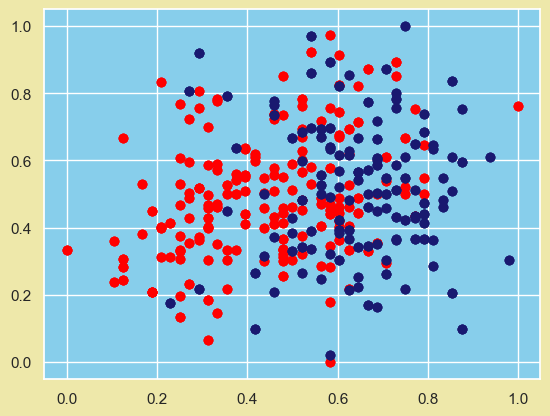

In [72]:
plt.scatter(df_kmeans.age[df_kmeans.kmeans_lable==0],df_kmeans.chol[df_kmeans.kmeans_lable==0], color="red")
plt.scatter(df_kmeans.age[df_kmeans.kmeans_lable==1],df_kmeans.chol[df_kmeans.kmeans_lable==1], color="midnightblue")

# OTHER MODELS

In [73]:
data=df1
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[ 96   2]
 [  5 102]]


Accuracy of DecisionTreeClassifier: 96.58536585365853 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.95      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Make predictions with the best estimator
dt_predicted = best_dt.predict(X_test)

# Compute the confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)

# Compute the accuracy score
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Print the results
print("Confusion Matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:", dt_acc_score * 100, '\n')
print("Classification Report")
print(classification_report(y_test, dt_predicted))
print("\nBest Parameters:", grid_search.best_params_)


Confusion Matrix
[[ 98   0]
 [  0 107]]


Accuracy of DecisionTreeClassifier: 100.0 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [82]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Ensembling
In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

About Stacking
Stacking or Stacked Generalization is an ensemble machine learning algorithm. It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.The stacking ensemble is illustrated in the figure below



In [76]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [77]:
from mlxtend.classifier import StackingCVClassifier

In [78]:
scv=StackingCVClassifier(classifiers=[dt,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[ 98   0]
 [  5 102]]


Accuracy of StackingCVClassifier: 97.5609756097561 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        98
           1       1.00      0.95      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



CONCLUSIONS 
1. The minimum age to have a heart disease start from 28 years old.
2. Most of the people get heart disease at the age of 53 to 54 years.
3. Most of the males and females get are with heart disease at the age of 54 to 55 years.
4. Male percentage i the data: 78.91% whereas Female percentage in the data : 21.09%
5. Males are 274.23% more than female in the data.
